<a href="#Overview"></a>
# Overview
* <a href="#15c59b83-11ca-4d86-8c0a-e86f50a07cfd">Overview</a>
* <a href="#4c3fdffb-4d15-43b4-a82e-c1d2eee908fa">Introduction</a>
  * <a href="#7068e59c-5213-4d7a-a8b0-cada6dc23ec2">Measuring Pupil Dilation as an Indicator of Listening Effort</a>
  * <a href="#2d166d52-3bb6-4fad-926e-340dad086c47">Experimental Paradigm</a>
    * <a href="#ed94f765-f14d-4c2a-8168-7a7ec54f0129">Auditory Stimuli</a>
    * <a href="#46d07529-b570-4617-9995-356045684614">Video Stimuli</a>
* <a href="#e812c59b-9423-4f58-8b3f-8eb21b91228b">Load Packages</a>
* <a href="#c753bb22-f1ac-4622-9bbf-098d64ac9f10">Exercise 1</a>
  * <a href="#97b0d685-bfb7-4100-88d5-429443e8129d">Load Data File</a>
  * <a href="#d414cae3-ca30-4d9c-a1c5-a07ca8c1be7a">Plot the Data</a>
* <a href="#2564e3d2-7050-4c1a-9350-67de385bad99">Exercise 2</a>
  * <a href="#e53edadc-74e5-4610-98c3-ba6cddbcc3ed">Plot a Single Trial</a>
* <a href="#1d6f0bb7-3447-4110-925d-8e2d9269f739">Exercise 3</a>
  * <a href="#98d2dfaf-3c4d-4b6b-98bc-fd3d0bea4695">Missing Data</a>
  * <a href="#bb33bab9-f817-430c-a888-d390b12a35cc">Get Rid of NaN Values</a>
  * <a href="#6ebb1fb2-f623-4fe5-87b2-7d60c29af912">Interpolate the Trial Data</a>
* <a href="#613c6a25-7e25-499d-ba5c-0fed8e192925">Exercise 4</a>
  * <a href="#d951908a-301c-4f62-b310-c88c3104b972">Filter the Trial Data</a>
* <a href="#7025b477-2743-42f0-8b6c-cff76b376cd6">Exercise 5</a>
  * <a href="#31e4b0fd-dac1-41a5-b168-3ef4a7b8fd9f">Interpolate All the Data</a>
* <a href="#b8ea4bac-3439-4c94-960c-999f486f3104">Exercise 6</a>
  * <a href="#95b5c647-6ec5-41b1-90b6-c5ae486386b0">Filter All the Data</a>
* <a href="#113acbcc-eeb7-4047-a838-e3f166f0e001">Exercise 7</a>
  * <a href="#48f1c369-0f37-49d1-b0d3-90ef5d0abc14">Average the Data</a>
  * <a href="#6c5355df-2643-4ee3-b3aa-e6ef364d88de">Average Across Eyes</a>
  * <a href="#4859261c-e9c4-4754-9870-15218535bb56">Average Across Condition</a>
  * <a href="#1b074998-b240-444d-a474-e237a9cec4b7">Bonus exercise</a>

<a id="15c59b83-11ca-4d86-8c0a-e86f50a07cfd"></a>
# Overview
<a href="#Overview">Return to overview</a>


<a id="4c3fdffb-4d15-43b4-a82e-c1d2eee908fa"></a>
# Introduction
<a href="#Overview">Return to overview</a>


<a id="7068e59c-5213-4d7a-a8b0-cada6dc23ec2"></a>
## Measuring Pupil Dilation as an Indicator of Listening Effort
<a href="#Overview">Return to overview</a>


One of the most common complaints among people with hearing loss is that they have difficulty understanding speech in difficult listening situations, such as in the presence of background noise. One way to assess difficulty in these situations is to measure performance on a listening task in terms of the ability to repeat back a target word correctly. However, this may underestimate the difficulty a person is experiencing because speech contains many redundant cues and even if some of the cues are distorted due to hearing loss, they may be able to use other acoustic cues or their linguistic knowledge to figure out the target. However, they may expend more cognitive resources in the process than someone with normal hearing who has access to all the acoustic cues. This can cause them to experience increased fatigue when listening compared to someone with normal auditory function.

One way to assess whether a listening task requires a lot of cognitive effort is to measure pupil dilation while the person is performing the task. The pupils dilate when a person is engaged in a difficult task and pupil diameter can be measured using an infrared camera. Listening effort, as measured by pupil dilation may be a more sensitive measure of auditory processing difficulty than how well a person actually performs on a speech recognition task.

<a id="2d166d52-3bb6-4fad-926e-340dad086c47"></a>
## Experimental Paradigm
<a href="#Overview">Return to overview</a>


<a id="ed94f765-f14d-4c2a-8168-7a7ec54f0129"></a>
### Auditory Stimuli
<a href="#Overview">Return to overview</a>


The auditory stimuli used in this experiment were 7 digit sequences (like a phone number, e.g., 389-1429) spoken by a male talker that had been time compressed at either 66% or 75%. Participants were asked to repeat back the last 4 digits in the sequence. The more the speech is time compressed, the more difficult the task.

In [ ]:
audio_filename = 'Sample_tcd_stimulus.wav'
from scipy.io import wavfile
fs, waveform=wavfile.read(audio_filename)
from IPython.display import Audio, display
display(Audio(waveform, rate=fs, autoplay=True))

<a id="46d07529-b570-4617-9995-356045684614"></a>
### Video Stimuli
<a href="#Overview">Return to overview</a>


In this experiment, pupil diameter was recorded while participants watched a precisely timed videos on a computer screen. Each stimulus consisted of a separate 16.5 second video. The visual portion of the video was identical for all stimuli and showed a gray screen for 2 seconds, followed by the appearance of a small black cross in the middle of the screen at 2 seconds, indicating the participant should get ready to listen. At 4-5 seconds, the auditory stimulus began, ending at 7 seconds. At 8.5 seconds, the cross changed to a box, indicating the participant should provide their response. The video then continued without any change for another 8 seconds.

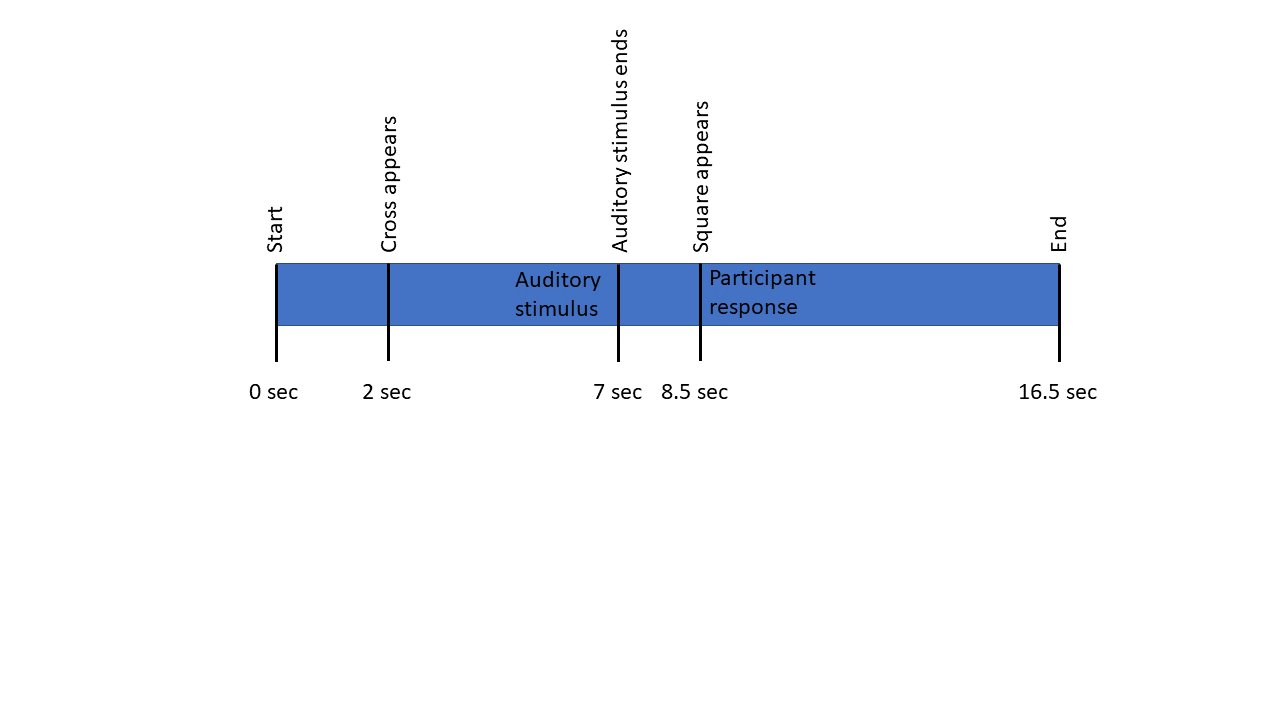

<a id="e812c59b-9423-4f58-8b3f-8eb21b91228b"></a>
# Load Packages
<a href="#Overview">Return to overview</a>


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate, signal

<a id="c753bb22-f1ac-4622-9bbf-098d64ac9f10"></a>
# Exercise 1
<a href="#Overview">Return to overview</a>


<a id="97b0d685-bfb7-4100-88d5-429443e8129d"></a>
## Load Data File
<a href="#Overview">Return to overview</a>


The data is located in a numpy array called `pupillometry.npy`

We learned how to load numpy arrays last week. If you need a reminder, look at the numpy documentation for loading a file.

Load the file as `data`. Once the file is loaded, take a look at it. What is the shape of the data? What is the data type (int or float)? 

In [ ]:
# Answer
data = np.load('pupillometry.npy')

print(data.shape)
print(data.dtype)

There are 96 trials. The 1st 48 are from the left eye and the 2nd 48 are from the right eye.
In each set of 48, the 1st 24 are time compressed at 66% (easier) and the 2nd 24 are time compressed at 75% (harder)

<a id="d414cae3-ca30-4d9c-a1c5-a07ca8c1be7a"></a>
## Plot the Data
<a href="#Overview">Return to overview</a>


If we just do `plt.imshow(data)`, it will create a "squished" image because it makes the height to width ratio of the image equal to the rows to columns ratio of the array. Since our array is 96 rows and 3390 columns, creating an image that's 4 inches wide would result in an image that is 96/3390 * 4 inches or 0.1 inches tall (imshow does this to ensure that each pixel is square)! So, add `aspect='auto'` to tell `plt.imshow` to ignore the actual dimensions of the array and stretch the pixels out as needed to fill the axes.

In [ ]:
# Answer
plt.imshow(data, aspect='auto')

This is a good point to talk about Numpy axes. Since `data` a 1D array, it contains two axes. It's common for Numpy operations to take an `axis` argument. The first runs vertically downward across rows (axis 0) and the second running horizontally across columns (axis 1). Many operations can take place along one of these axes. For example, we can take the average of each row of an array, in which case we operate along columns (axis 1).

The `shape` attribute of `data` is a two-element tuple telling you the number of values in each axis (i.e., rows x cols). You can access the number of elements in axis 0 by typing:

    data.shape[0]
    
Likewise, you can access the number of elements in axis 1 by typing:

    data.shape[1]
    
By definition, the axis number for the dimension is the index of that dimension within the array's shape.

<a id="2564e3d2-7050-4c1a-9350-67de385bad99"></a>
# Exercise 2
<a href="#Overview">Return to overview</a>


<a id="e53edadc-74e5-4610-98c3-ba6cddbcc3ed"></a>
## Plot a Single Trial
<a href="#Overview">Return to overview</a>


Let's take a closer look at the data by plotting the first row. First, pull out the first row from `data` and save it as a new array, `trial`. Then, plot it.

In [ ]:
# Answer
trial = data[0, :]
plt.plot(trial)

The X-axis is a bit meaningless. By default, `plt.plot` just creates an axis that reflects the index in the array (we have 3390 values in trial). Let's make it meaningful by creating an array containing the X-values we want to use. We will call the array `time` because that's what it reflects. If you know we acquired one value every 5 msec, how would we calculate the values needed? We need to do the following:

* Figure out how many entries `time` should have (hint, `plt.plot` needs the same number of x and y values). 
* Create an array containing a sequence of values from 0 ... n-1 (hint, numpy has a method that will return evenly spaced values within a given interval - this is something we did last week)
* Multiply it by the sample period

Once you have created the `time` array, plot `trial` again, this time using your `time` array for the x-axis.

In [ ]:
# Answer
period = 5e-3
n = len(trial)
indices = np.arange(n)
time = indices * period

In [ ]:
# Answer
plt.plot(time, trial)

<a id="1d6f0bb7-3447-4110-925d-8e2d9269f739"></a>
# Exercise 3
<a href="#Overview">Return to overview</a>


<a id="98d2dfaf-3c4d-4b6b-98bc-fd3d0bea4695"></a>
## Missing Data
<a href="#Overview">Return to overview</a>


Notice that there is missing data at many of the time points. Any idea what might be causing this? Remember that we are recording pupil dilation over a relatively long time period (16.5 seconds).

We want to interpolate the missing data so we can analyze it. We will be using `scipy.interpolate.interp1d` to interpolate the missing data. At the beginning of the notebook we ran:

    from scipy import interpolate
    
How do we access the function we want? Go ahead and pull up the documentation for the function using the question mark approach.

In [ ]:
# Answer
interpolate.interp1d?

<a id="bb33bab9-f817-430c-a888-d390b12a35cc"></a>
## Get Rid of NaN Values
<a href="#Overview">Return to overview</a>


See the comment in the function documentation indicating that the behavior of the function is undefined when `NaN` values are present? We need to remove the `NaN` values. How might we do this? 

The obvious approach of doing:

    trial != np.NaN
    
Does not work. That's because by defnition, *any* operations performed on a `NaN` value must result in either an error or yield a False value. Run the following cell.

In [ ]:
result = True == True
print(f'True == True is {result}')
result = False == False
print(f'False == False is {result}')
result = None == None
print(f'None == None is {result}')
result = np.inf == np.inf
print(f'np.inf == np.inf is {result}')
result = np.NaN == np.NaN
print(f'np.NaN == np.NaN is {result}')

`NaN` values behave the same in any programming language. The reason for this behavior is to ensure that `NaN` values always propagate throughout your computations without accidentally being overwritten with a (seemingly) valid value.

Fortunately, there's a function, `np.isnan(x)`, that returns a boolean mask that's True wherever the value in x is `NaN`. Go ahead and do the following:
* Create a mask (call it `nan_mask`) that's True wherever a value in `trial` is `NaN`.
* Invert `nan_mask` (so True is now False and False is now True). 
* Save it in `valid_mask`. 

After this operation, `valid_mask` will be True wherever `trial` contains valid (i.e., not-`NaN`) data.
If you did this correctly, `print(valid_mask)` will give you:

    [ True  True  True ... False False False]
    
*Bonus:*
1. Count the number of missing values in the trial.
2. What percent of data is missing from the trial?

In [ ]:
# Answer
nan_mask = np.isnan(trial)
valid_mask = ~nan_mask
print(valid_mask)

In [ ]:
# Answer (bonus)
n_missing = np.sum(nan_mask)
pct_missing = np.mean(nan_mask) * 100
print(f'{n_missing} values missing ({pct_missing:.0f}% of array)')

Now, create two new arrays, `x` and `y` containing only the valid data from `time` and `trial`, respectively. Remember how you can use a mask to pull out a subset of values in a DataFrame? You can do the same for arrays. Once you've done it, plot `x` vs. `y` and compare with your earlier plot of `time` vs. `trial`.

*Bonus:* Label the lines and add a legend

In [ ]:
# Answer
x=time[valid_mask]
y=trial[valid_mask]
plt.plot(x, y, label='NaN values removed')
plt.plot(time, trial, label='With NaN values')
plt.legend()

<a id="6ebb1fb2-f623-4fe5-87b2-7d60c29af912"></a>
## Interpolate the Trial Data
<a href="#Overview">Return to overview</a>


In the plot above, no interpolation is actually happening yet. Matplotlib just draws a line between all the data points. If an array contains `NaN` data (as in our earlier plot), then Matplotlib puts a break in the line where the missing data is. Since we removed all the missing values for `x` and `y`, Matplotlib just draws a straight segment between the points in the array.

Now, we want to interpolate our missing values. The `interpolate.interp1d` function takes the x and y values (along with some extra arguments that control the behavior of the interpolation) and returns a **new function**. This new function was created on the fly and takes a single argument, the new values of `x` that we would like to interpolate.

First, let's create our function `interpolator` by calling `interpolate.interp1d` with our `x` and `y` values. Set `fill_value='extrapolate'` in the function as well since, by default, interpolation will raise an error if you attempt to *extrapolate* (i.e., guess values outside the range of x-values containing not-NaN data).

Now, take this freshly-created function and call it with the full set of x-values we want. Remember, it takes a single argument (the x-values we want y-values for). We want to know the pupil diameter for *every* single timepoint. So, `time` is our set of x-values. Save the output (i.e., the interpolated y-values) to `trial_interp`.

Plot the interpolated values in `trial_interp` and compare to the uniterpolated values in `trial`. Set linewidth (`lw=4`) for the interpolated plot so you can distinguish the two plots better.

*Bonus:* By default `interpolate.interp1d` uses linear interpolation, but there are other options. Use 'nearest' interpolation and then limit the x-axis range to only the first 5 seconds. What does this do?

In [ ]:
# Answer
interpolator = interpolate.interp1d(x, y, fill_value='extrapolate')
trial_interp = interpolator(time)
plt.plot(time, trial_interp, lw=4, label='linear')

# Bonus
interpolator = interpolate.interp1d(x, y, kind='nearest', fill_value='extrapolate')
trial_interp = interpolator(time)
plt.plot(time, trial_interp, lw=4, label='nearest')
plt.axis(xmin=0, xmax=5)

plt.plot(time, trial, lw=1, label='uninterpolated')
plt.legend()

<a id="613c6a25-7e25-499d-ba5c-0fed8e192925"></a>
# Exercise 4
<a href="#Overview">Return to overview</a>


<a id="d951908a-301c-4f62-b310-c88c3104b972"></a>
## Filter the Trial Data
<a href="#Overview">Return to overview</a>


You can see from our plots so far that pupil dilation data contains a lot of high frequency noise. The next step for the analysis is to low pass filter the data. A tutorial on digital signal processing is beyond the scope of this tutorial, but suffice to say you need to calculate some *filter coefficients*, `b` and `a` that are used by `scipy.signal.filtfilt` to perform the filtering. There are a number of functions in `scipy.signal` that can be used to compute the filter coefficients based on the type of filter you want. Let's use a basic 2.5 Hz lowpass butterworth filter. Run the block of code provided for you below to set up the filter and verify the frequency response is appropriate. 

In [ ]:
# Cutoff frequency in Hz
cutoff_frequency = 2.5

# Calculate the filter coefficients
Wn = cutoff_frequency * period * 2
b, a = signal.iirfilter(2, Wn, btype='lowpass')

# Plot the frequency response of the filter to verify it's good
w, h = signal.freqz(b, a, fs=1/period)
plt.plot(w, np.abs(h))
plt.axvline(cutoff_frequency, ls=':')
plt.xlabel('Frequency (Hz)')
plt.xlabel('Filter gain')

Now, let's use `signal.filtfilt` to filter the interpolated values in `trial_interp`. Go ahead and try it. If you look up the `signal.filtfilt` function, the first two arguments are very obvious. Save the filtered data as `trial_filt` and plot it over `trial_interp`. Only plot the first 5 seconds so you can more obviously see the difference between the two plots.

*Bonus:* Cut and paste the following code below and play with the filter settings (e.g., `cutoff_frequency`) to get a sense for how it might affect the plot. Compare your modified filter settings with the unfiltered data as well as the 5 Hz filtered data by plotting the three lines on the same plot. Note that I labeled the coefficients `bn` and `an` to avoid overwriting `b` and `a`. For fun, you could even change `btype` to `highpass` and see what you get.

    cutoff_frequency = 5
    Wn = cutoff_frequency * period * 2
    bn, an = signal.iirfilter(2, Wn, btype='lowpass')


In [ ]:
# Answer
trial_filt = signal.filtfilt(b, a, trial_interp)
plt.plot(time, trial_filt, label='5 Hz lowpass')
plt.plot(time, trial_interp, label='unfiltered')
plt.axis(xmin=0, xmax=5)

# Bonus
cutoff_frequency = 2.5
Wn = cutoff_frequency * period * 2
bn, an = signal.iirfilter(2, Wn, btype='lowpass')
trial_filt_n = signal.filtfilt(bn, an, trial_interp)
plt.plot(time, trial_filt_n, label='0.5 Hz lowpass')

plt.legend()

<a id="7025b477-2743-42f0-8b6c-cff76b376cd6"></a>
# Exercise 5
<a href="#Overview">Return to overview</a>


<a id="31e4b0fd-dac1-41a5-b168-3ef4a7b8fd9f"></a>
## Interpolate All the Data
<a href="#Overview">Return to overview</a>


Nice, but we want to interpolate and filter all 96 trials. We could write a `for` loop to help us, but one nice thing about Numpy is that it offers something called vectorized operations where it automatically can perform operations along an axis.

We want to interpolate *every* row of `data` and get a new array, `data_interp` back. Some functions (e.g., `scipy.signal.filtfilt`) accept an optional `axis` argument that applies the operation along that axis. Unfortunately, `interpolate.interp1d`, doesn't. Fortunately, there's a helper function in Numpy, `apply_along_axis`, that will take a function and apply the function along the specified axis. Once we're done, our code will look like this:

    data_interp = np.apply_along_axis(interp_trial, axis=1, arr=data, time=time)

There's a lot going on in this line. It's taking four arguments:

* `interp_trial`: This is a function that takes the 1D array containing missing data and returns a 1D array containing the interpolated values.
* `axis=1`: Remember how a Numpy array has multiple axes and you can specify which axis you want via an integer? We are telling Numpy to apply `interp_trial` along axis 1 (i.e., across all columns for each row).
* `arr=data`: The array we want to interpolate row-wise.
* `time=time`: Additional data that we want to pass to the function.

First, let's write a function to interpolate a single trial (i.e., a 1D array). We already did this earlier:

    nan_mask = np.isnan(trial)
    valid_mask = ~nan_mask
    x = time[valid_mask]
    y = trial[valid_mask]
    interpolator = interpolate.interp1d(x, y, fill_value='extrapolate')
    trial_interp = interpolator(time)

Now, wrap all of this up in a function, `interp_trial` that takes two arguments, `trial` and `time`. The `apply_along_axis` function always passes the 1D array as the first argument so additional parameters (such as `time`) must come after the first parameter. Don't forget to return `trial_interp`. Test it out by running the following cell after your function.

In [ ]:
# Answer
def interp_trial(trial, time):
    nan_mask = np.isnan(trial)
    valid_mask = ~nan_mask
    x = time[valid_mask]
    y = trial[valid_mask]
    interpolator = interpolate.interp1d(x, y, fill_value='extrapolate')
    trial_interp = interpolator(time)
    return trial_interp

In [ ]:
# Test code
trial_interp = interp_trial(trial, time)
plt.plot(time, trial_interp, lw=3, label='interpolated')
plt.plot(time, trial, label='uninterpolated')
plt.legend()

Now that we've defined `interp_trial`, we can run the code described above to apply the function across all the rows

In [ ]:
data_interp = np.apply_along_axis(interp_trial, axis=1, arr=data, time=time)

Now, using `plt.subplots`, create a 1x2 grid of axes. Using `imshow`, plot the uninterpolated array (`data`) on the first subplot and the interpolated data (`data_interp`) on the second subplot.

*Bonus:* Use the `extent` parameter to properly label the x-axis so it runs from 0 to 16.5 sec.

In [ ]:
# Answer

# Extents are x_start, x_end, y_start, y_end
extent = (0, 16.5, 0, 96)
figure, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(data, aspect='auto', extent=extent)
ax2.imshow(data_interp, aspect='auto', extent=extent)

<a id="b8ea4bac-3439-4c94-960c-999f486f3104"></a>
# Exercise 6
<a href="#Overview">Return to overview</a>


<a id="95b5c647-6ec5-41b1-90b6-c5ae486386b0"></a>
## Filter All the Data
<a href="#Overview">Return to overview</a>


Now, we want to apply a 2.5 Hz lowpass butterworth filter to our `data_interp` array. Remember how we said that `signal.filtfilt` already has an argument that can be used to apply the function along an axis? Go ahead and try it. Save the resulting array as `data_filt`. We already have the filter coefficients, `b` and `a` defined, so all you have to do is take:

`data_filt = signal.filtfilt(b, a, ..., ...)`

And figure out what to put in the two ... to get it to filter each row in the array. Be sure to use `imshow` to visualize the filtered array. You won't see much of a difference between the image for `data_filt` and the image for `data_interp` because some smoothing is done to fit the image on screen.

*Bonus:*
* Be sure to set `extent` so that the axes limits are labeled properly.
* Use `vmin` and `vmax` to ensure that the color scale on both plots are identical.
* Add a colorbar

In [ ]:
# Answer
data_filt = signal.filtfilt(b, a, data_interp, axis=1)

vmin = min(data_interp.min(), data_filt.min())
vmax = max(data_interp.max(), data_filt.max())
figure, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(data_interp, vmin=vmin, vmax=vmax, extent=extent, aspect='auto')
img = ax2.imshow(data_filt, vmin=vmin, vmax=vmax, extent=extent, aspect='auto')
plt.colorbar(img)

<a id="113acbcc-eeb7-4047-a838-e3f166f0e001"></a>
# Exercise 7
<a href="#Overview">Return to overview</a>


<a id="48f1c369-0f37-49d1-b0d3-90ef5d0abc14"></a>
## Average the Data
<a href="#Overview">Return to overview</a>


Now, let's calculate and plot the average! Call it `data_filt_mean`. We want to compute the average across all trials. Remember we have 96 trials and 3390 timepoints. What do we expect the shape of the resulting array to have? Now, Numpy has a function, `mean` that can compute the average. It also accepts an axis argument. When we're computing the average across trials, which axis do we want to use? 0 or 1? Think about it this way, what 1D slice do we want to pass to average?

If you perform an operation like `np.mean(axis=n)`, then dimension n is collapsed and deleted, with each value in the new array equal to the mean of the corresponding collapsed values. For example, if a has shape (5, 6), and you do `b = np.mean(a, axis=1)`, then axis 1 (dimension with size 6) is collapsed, and b is a 1D array with shape (5,).

Once you calculate `data_filt_mean`, plot it. Don't forget to use the `time` array you created earlier so that your x-axis makes sense.

Bonus: Add a vertical dashed line at 8.5 to indicate when the response prompt was presented.

In [ ]:
# Answer
data_filt_mean = np.mean(data_filt, axis=0)
plt.plot(time, data_filt_mean)
plt.axvline(8.5, ls=':')

There are two peaks of interest here. The first occurs shortly after the participant is prompted to provide their response at 8.5 seconds and the second occurs later, around 13 seconds. The first peak indicates the effort required to generate a response given the stimulus and the second peak is thought to be related to a post-response evaluation of performance. For example, if it was really hard to understand the stimulus, you might spend more time thinking about whether you actually provided the correct response.

<a id="6c5355df-2643-4ee3-b3aa-e6ef364d88de"></a>
## Average Across Eyes
<a href="#Overview">Return to overview</a>


Now, we want to average the pupil diameter measurements of the right and left eyes together. Remember that the left eye is the first 48 rows and the right eye is the second 48 rows (total of 96 rows). How would we extract the first 48 rows of `data_filt` into a new variable, `left` and the second 48 rows into a new variable, `right`?

In [ ]:
# Answer
left = data_filt[:48,:]
right = data_filt[48:,:]

Now average `left` and `right` together and save in a new variable `average`. What is the shape of `average`?

*Bonus:* Instead of splitting the array into two, how might we use `reshape` and `mean` to average across pupil?

In [ ]:
# Answer
average = (left + right)/ 2
average.shape

# Bonus answer
data_filt_rs = data_filt.reshape((2, 48, -1))
print(data_filt_rs.shape)
# data_filt_rs[0] contains left eye
# data_filt_rs[1] contains right eye
average = data_filt_rs.mean(axis=0)

<a id="4859261c-e9c4-4754-9870-15218535bb56"></a>
## Average Across Condition
<a href="#Overview">Return to overview</a>


Good, now we only have only 48 rows (since we averaged together the two eyes). Now, we want to pull out the trials from the two different stimulus conditions: 75% time compression (first 24 rows) and 66% time compression (last 24 rows) trials and compute the "75%" and "66%" averages. Save these as `average_75` and `average_66`. Check the shape once the averages are computed. They should each be `(3390,)`.

*Bonus:* Use `reshape` and `mean` to compute the average for each condition. You'll end up with an array of shape `(2, 3390)` with the first row containing data for 75% tim compression and the second row containing data for 66% time compression. You can use the bonus answer from above to guide you, but think very carefully about which axis you want to average across. Is it still axis 0?

In [ ]:
# Answer
compression_75 = average[:24,:]
compression_66 = average[24:,:]
average_75= np.mean(compression_75, axis=0)
average_66= np.mean(compression_66, axis=0)

average_75.shape
average_66.shape

# Bonus
average_rs = average.reshape((2, 24, -1))
tcd_average = average_rs.mean(axis=1)

Plot `average_75` and `average_66` together on the same plot. Label them as 75% and 66%.

*Bonus:* 
* Add a dashed black vertical line to the plot at 7 seconds (corresponding to the offset of the stimulus) and a sold black vertical line at 8.5 seconds (corresponding to when the subject is prompted to provide a response)
* Add axis labels (Pupil Dilation (mm) and Time (sec))
* Specify the colors for the two conditions

In [ ]:
# Answer
plt.plot(time, average_75, 'b', label='75%')
plt.plot(time, average_66, 'g', label='66%')
plt.axvline(x=7, color='k', linestyle='--')
plt.axvline(x=8.5, color='k')
plt.xlabel('Time (sec)')
plt.ylabel ('Pupil Dilation (mm)')
plt.legend()

For this subject, pupil dilation is similar right after being prompted for a response, but is higher for the 75% (harder) time compressed condition after the response is provided.

<a id="1b074998-b240-444d-a474-e237a9cec4b7"></a>
## Bonus exercise
<a href="#Overview">Return to overview</a>
Go back to `data_filt`. Now, `reshape` it into a 4D array where axis 0 is pupil, axis 1 is condition, axis 2 is trial and axis 3 is time. Then, calculate the mean across trials for each condition and pupil. The result will be a 2 x 2 x 3390 array (pupil, condition, time). Now, recreate the plot in the previous exercise, except, you will now be plotting each pupil and condition separately. Plot the left pupil using a solid line and the right pupil using a dashed line. If you are successful, you will get the following plot:

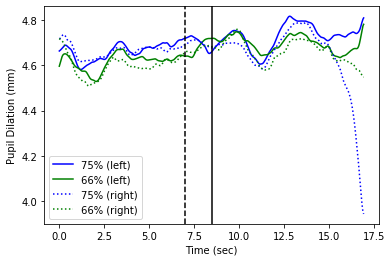

In [ ]:
# Answer
data_filt_rs = data_filt.reshape((2, 2, 24, -1))
average = np.mean(data_filt_rs, axis=2)
print(average.shape)

plt.plot(time, average[0, 0], 'b', label='75% (left)')
plt.plot(time, average[0, 1], 'g', label='66% (left)')
plt.plot(time, average[1, 0], 'b:', label='75% (right)')
plt.plot(time, average[1, 1], 'g:', label='66% (right)')
plt.axvline(x=7, color='k', linestyle='--')
plt.axvline(x=8.5, color='k')
plt.xlabel('Time (sec)')
plt.ylabel ('Pupil Dilation (mm)')
plt.legend()